# Problem 1
A static map of cycling accidents in Helsinki

In [70]:
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [56]:
# Import the data, select columns that are needed
fp ="data/tieliikenneonnettomuudet_2019_onnettomuus.csv"

data = pd.read_csv(fp, delimiter=";", usecols=["Onnett_id", "X", "Y", "Vakavuusko", "Vakavuus", "Onluokka", "Kuntasel"])

In [57]:
data.dtypes

Onnett_id       int64
Vakavuusko      int64
Vakavuus       object
Onluokka        int64
Kuntasel       object
X             float64
Y             float64
dtype: object

In [58]:
data


,Onnett_id,Vakavuusko,Vakavuus,Onluokka,Kuntasel,X,Y
0,9332527,0,Ei henkilövahinkoja,6,Helsinki,382577.0,6675844.0
1,9343914,0,Ei henkilövahinkoja,1,Helsinki,382543.0,6675979.0
2,9398457,0,Ei henkilövahinkoja,6,Helsinki,382542.0,6675979.0
3,9398382,0,Ei henkilövahinkoja,6,Helsinki,382540.0,6675979.0
4,9533397,0,Ei henkilövahinkoja,1,Helsinki,382491.0,6675945.0
...,...,...,...,...,...,...,...
15292,9534641,2,Loukkaantumiseen johtanut,1,Muonio,361920.0,7539419.0
15293,9534611,2,Loukkaantumiseen johtanut,1,Sastamala,293592.0,6811639.0
15294,9533505,2,Loukkaantumiseen johtanut,13,Vantaa,394062.0,6692018.0
15295,9533827,0,Ei henkilövahinkoja,1,Kuopio,514489.0,6973933.0


In [62]:
# Select only bicycle accidents (Onluokka=8) that have happenede in Helsinki, Espoo, Vantaa or Kauniainen

# Create a list for the municipalities on the map
municipalities = ["Helsinki", "Espoo", "Vantaa", "Kauniainen"]

# Filter the data by acciden type and municipality
data = data.loc[data["Onluokka"]==8]
data = data.loc[data["Kuntasel"].isin(municipalities)]

In [63]:
data

,Onnett_id,Vakavuusko,Vakavuus,Onluokka,Kuntasel,X,Y
4192,9397810,2,Loukkaantumiseen johtanut,8,Espoo,376930.0,6678592.0
4250,9398107,2,Loukkaantumiseen johtanut,8,Helsinki,380731.0,6680518.0
6734,9476505,2,Loukkaantumiseen johtanut,8,Vantaa,381118.0,6688590.0
6739,9388337,2,Loukkaantumiseen johtanut,8,Vantaa,381368.0,6687988.0
7660,9388326,2,Loukkaantumiseen johtanut,8,Vantaa,393737.0,6683870.0
...,...,...,...,...,...,...,...
14310,9533782,2,Loukkaantumiseen johtanut,8,Helsinki,389703.0,6680897.0
14347,9533500,2,Loukkaantumiseen johtanut,8,Vantaa,392320.0,6688521.0
14366,9533787,2,Loukkaantumiseen johtanut,8,Helsinki,390572.0,6681097.0
14449,9534454,2,Loukkaantumiseen johtanut,8,Helsinki,393305.0,6678405.0


Turn the data into a geodataframe

In [74]:
# Use function from geopnadas for the task
geo = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.X, data.Y))

In [73]:
geo

,Onnett_id,Vakavuusko,Vakavuus,Onluokka,Kuntasel,X,Y,geometry
4192,9397810,2,Loukkaantumiseen johtanut,8,Espoo,376930.0,6678592.0,POINT (376930.000 6678592.000)
4250,9398107,2,Loukkaantumiseen johtanut,8,Helsinki,380731.0,6680518.0,POINT (380731.000 6680518.000)
6734,9476505,2,Loukkaantumiseen johtanut,8,Vantaa,381118.0,6688590.0,POINT (381118.000 6688590.000)
6739,9388337,2,Loukkaantumiseen johtanut,8,Vantaa,381368.0,6687988.0,POINT (381368.000 6687988.000)
7660,9388326,2,Loukkaantumiseen johtanut,8,Vantaa,393737.0,6683870.0,POINT (393737.000 6683870.000)
...,...,...,...,...,...,...,...,...
14310,9533782,2,Loukkaantumiseen johtanut,8,Helsinki,389703.0,6680897.0,POINT (389703.000 6680897.000)
14347,9533500,2,Loukkaantumiseen johtanut,8,Vantaa,392320.0,6688521.0,POINT (392320.000 6688521.000)
14366,9533787,2,Loukkaantumiseen johtanut,8,Helsinki,390572.0,6681097.0,POINT (390572.000 6681097.000)
14449,9534454,2,Loukkaantumiseen johtanut,8,Helsinki,393305.0,6678405.0,POINT (393305.000 6678405.000)


<AxesSubplot:>

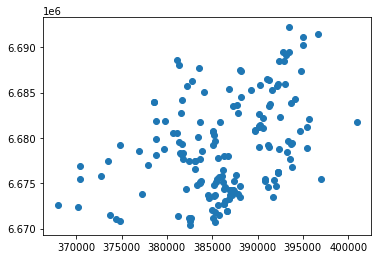

In [75]:
geo.plot()